# Contents
### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating a path to import dataframe

path = r'/Users/shailioza/Documents/CareerFoundry Projects'

In [9]:
# Importing Dataframe 

df = pd.read_csv(os.path.join(path, 'pollution_clean.csv'))

## 2. Data Cleaning

In [10]:
df.head()

,Unnamed: 0,Date,Year,Month,Day,Address,State,County,City,O3 Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [11]:
# Drop specific unnecesary columns
columns_to_drop = ['Unnamed: 0', 'Date', 'Address']
df.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
df.head()

,Year,Month,Day,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000,1,1,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000,1,2,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000,1,3,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000,1,4,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000,1,5,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [13]:
df.shape

(607220, 22)

In [14]:
df.columns

Index(['Year', 'Month', 'Day', 'State', 'County', 'City', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI'],
      dtype='object')

In [15]:
# Check for missing values
df.isnull().sum()

Year                 0
Month                0
Day                  0
State                0
County               0
City                 0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
dtype: int64

##### No missing values to handle

#### We have already checked for extreme values in the previous task, so don't need to check again

In [16]:
df.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,607220.00000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000,607220.000000
mean,2011.02600,6.508797,15.736311,0.028479,0.038913,10.773754,39.125773,0.337592,0.477364,5.977740,5.384142,1.525947,4.217716,8.850127,5.579668,11.751282,23.634059,11.606154,22.146827
std,6.12119,3.310174,8.807061,0.012223,0.015036,3.306829,22.492364,0.283183,0.446654,7.740305,5.146521,2.497413,7.991344,6.774071,10.745813,9.087638,15.417409,7.881245,14.614606
min,2000.00000,1.000000,1.000000,-0.000706,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.00000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.188235,0.600000,3.000000,0.000000,4.995833,11.300000,5.000000,10.000000
50%,2011.00000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.565217,21.900000,9.000000,20.000000
75%,2016.00000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.779167,4.000000,13.000000,6.000000,16.330435,33.700000,20.000000,31.000000
max,2021.00000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


## 3. Data prep for regression analysis

### Hypothesis: There is a relationship between air pollutant concentrations and specific days of the months or months of a year

### Hypothesis: The levels of specific air pollutants have changed over time.

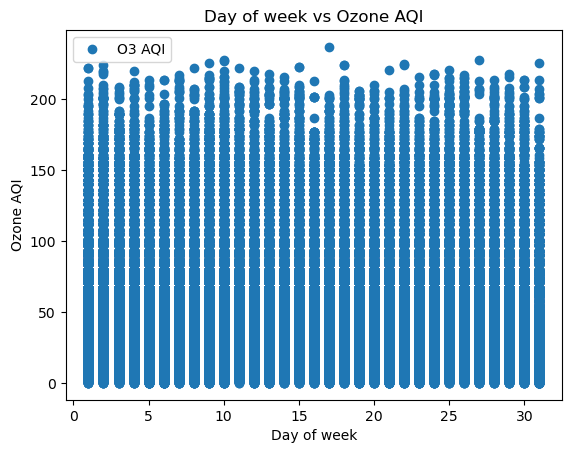

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Day', y='O3 AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Day of week vs Ozone AQI')  
plt.xlabel('Day of week')  
plt.ylabel('Ozone AQI')  
plt.show()

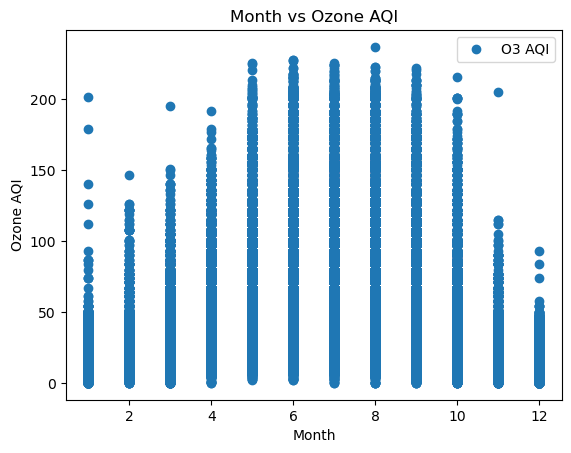

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Month', y='O3 AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Month vs Ozone AQI')  
plt.xlabel('Month')  
plt.ylabel('Ozone AQI')  
plt.show()

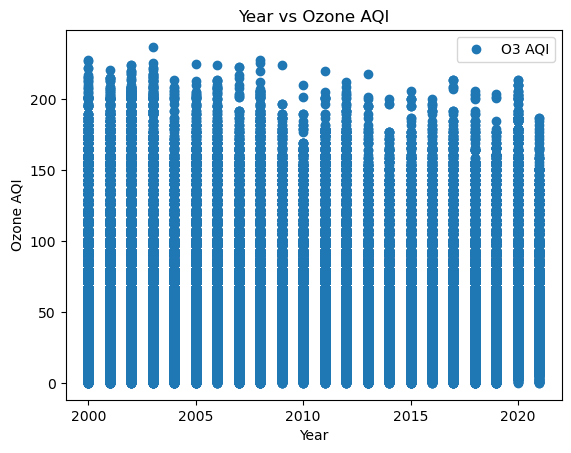

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='O3 AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year vs Ozone AQI')  
plt.xlabel('Year')  
plt.ylabel('Ozone AQI')  
plt.show()

## Since we can observe more ozone pollution in the summer months, we can verify if the pattern remains the same for other pollutants as well. 

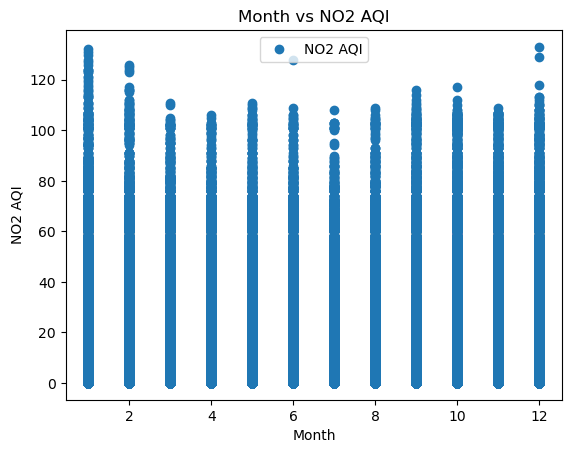

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Month', y='NO2 AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Month vs NO2 AQI')  
plt.xlabel('Month')  
plt.ylabel('NO2 AQI')  
plt.show()

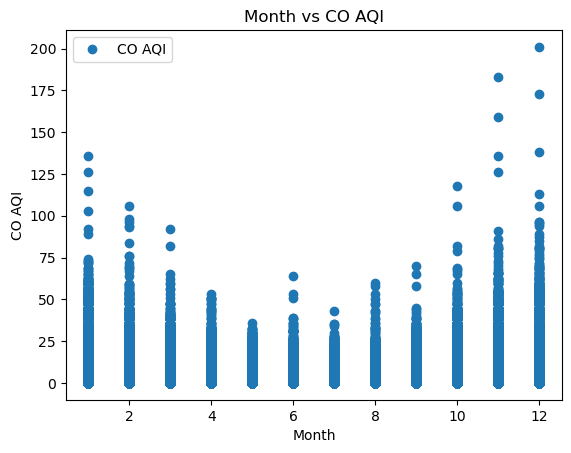

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Month', y='CO AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Month vs CO AQI')  
plt.xlabel('Month')  
plt.ylabel('CO AQI')  
plt.show()

## NO2 and CO AQI shows opposite trend. Their values are higher in winter months and significantly less in summer.

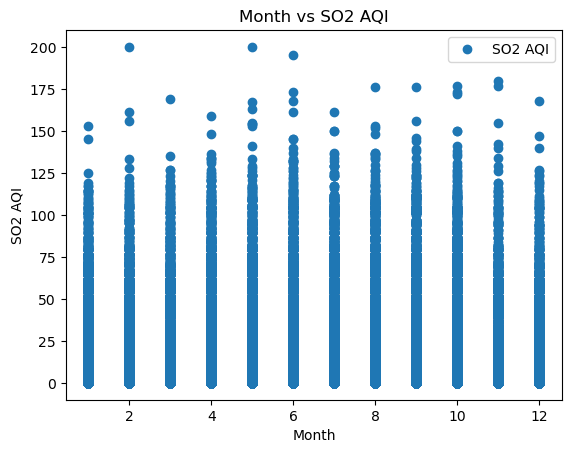

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Month', y='SO2 AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Month vs SO2 AQI')  
plt.xlabel('Month')  
plt.ylabel('SO2 AQI')  
plt.show()

## SO2 does not show much of a trend over the months. 

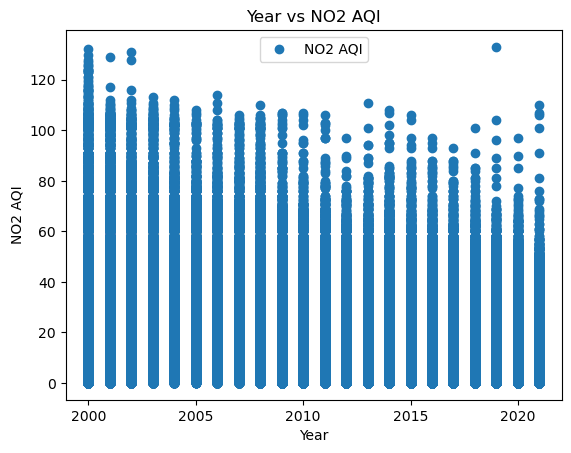

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='NO2 AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year vs NO2 AQI')  
plt.xlabel('Year')  
plt.ylabel('NO2 AQI')  
plt.show()

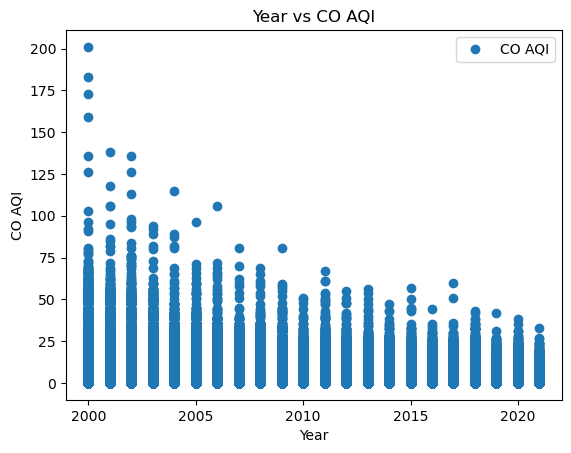

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='CO AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year vs CO AQI')  
plt.xlabel('Year')  
plt.ylabel('CO AQI')  
plt.show()

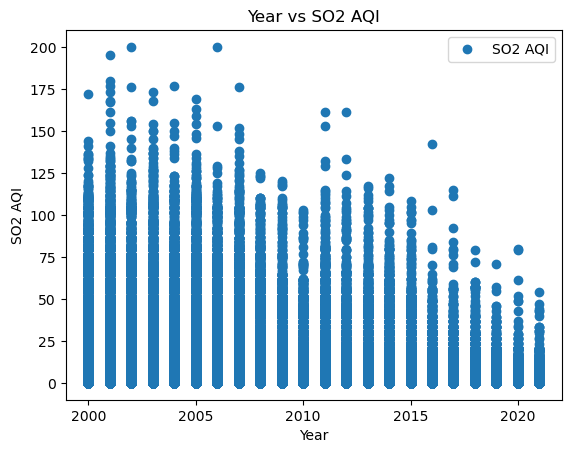

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='SO2 AQI',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year vs SO2 AQI')  
plt.xlabel('Year')  
plt.ylabel('SO2 AQI')  
plt.show()

## Apart from ozone, other pollutants show significant decrease in AQI over 2 decades.

## Hypothesis: There is a correlation between air pollutant concentrations and health impact (measured by AQI)

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['O3 Mean'].values.reshape(-1,1)
y = df['O3 AQI'].values.reshape(-1,1)

In [27]:
X

array([[0.019765],
       [0.015882],
       [0.009353],
       ...,
       [0.039765],
       [0.049176],
       [0.052333]])

In [28]:
y

array([[37],
       [30],
       [15],
       ...,
       [46],
       [61],
       [50]])

In [29]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


## 4. Regression Analysis

In [30]:
# Create regression object
regression = LinearRegression()

In [31]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

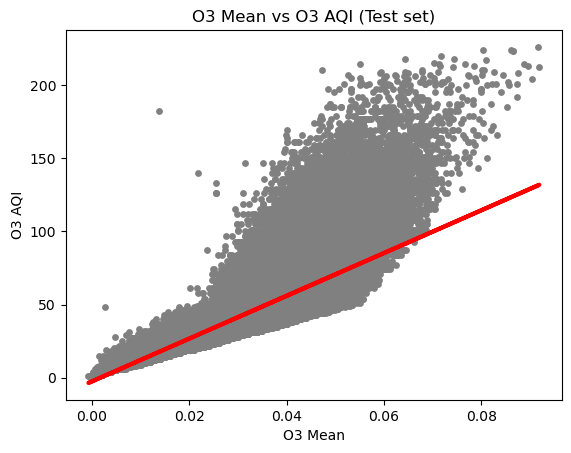

In [33]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('O3 Mean vs O3 AQI (Test set)')
plot_test.xlabel('O3 Mean')
plot_test.ylabel('O3 AQI')
plot_test.show()

#####  The graph does show some linearity between O3 Mean (pollutant concentration) and it's corresponding AQI value

In [34]:
# Check the slope, MSE and R2 score.
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1461.9996085]]
Mean squared error:  186.03584090859883
R2 score:  0.630417446258817


In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,32,39.635975
1,54,67.327710
2,17,8.331639
3,61,57.867110
4,42,61.650765
5,22,24.068603
6,30,34.733890
7,27,17.447207
8,24,14.093380
9,22,16.844863


#### The summary statistics of the model confirms that the model is in fact accurate. It can also be seen by the variance in the actual vs prdicted values. An R2 score of 0.63 indicates a good fit and the large MSE can be ignored as the dataframe is very large. The slope of 1461.99 shows that as O3 Mean increases, the corresponding AQI increases as well.

### Compare how the regression fits the training set

In [37]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1461.9996085]]
Mean squared error:  187.52007166840613
R2 score:  0.6301330412063957


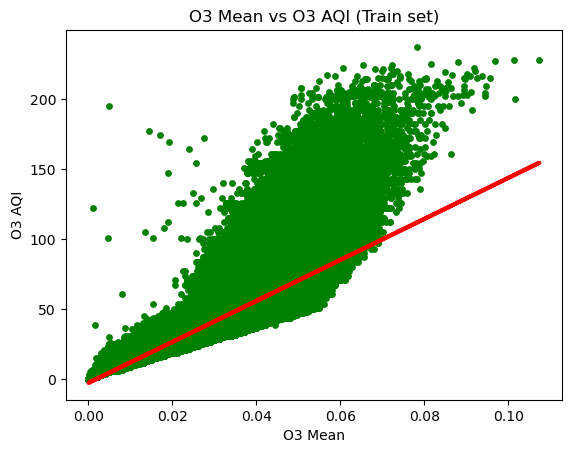

In [42]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('O3 Mean vs O3 AQI (Train set)')
plot_test.xlabel('O3 Mean')
plot_test.ylabel('O3 AQI')
plot_test.show()

### The model's outcome on the training set is very similar to that on the test set.  With the MSE being only one point higher on the train set.  Confirming that this is a good model to use.  This proves that O3 Mean (pollutant concentration) has a significant impact on the AQI. 

### Since there are no outliers, there no need to retrain the model after removing them. The results we have already got are significantly positive.

#### The same code is used to test the hypothesis for all remaining pollutants.

## Regression analysis for CO 

In [43]:
X_2 = df['CO Mean'].values.reshape(-1,1)
y_2 = df['CO AQI'].values.reshape(-1,1)

In [44]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [45]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [46]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [47]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[17.0739734]]
Mean squared error:  3.1536132662661154
R2 score:  0.879407213830112


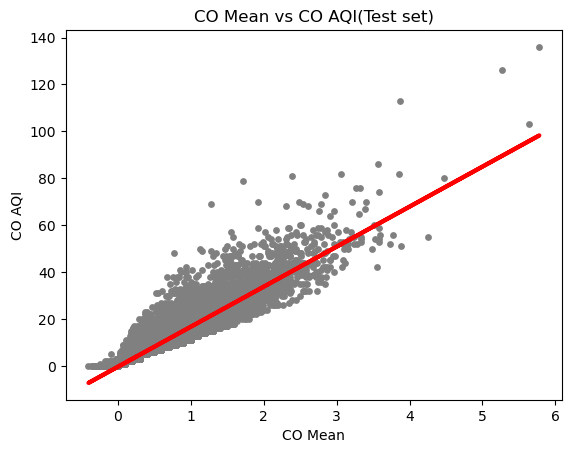

In [49]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('CO Mean vs CO AQI(Test set)')
plot_test.xlabel('CO Mean')
plot_test.ylabel('CO AQI')
plot_test.show()

##### The graph does shows linearity between CO Mean (pollutant concentration) and it's corresponding AQI value

In [52]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,3.0,3.887961
1,5.0,3.389965
2,13.0,15.128321
3,2.0,2.180564
4,1.0,1.326865
5,1.0,1.184588
6,7.0,9.508150
7,5.0,3.887961
8,22.0,22.882757
9,2.0,1.682567


In [53]:
# Predict on the training set

y_predicted_train_2 = regression.predict(X_train_2) # This is predicting X_train_2!

In [55]:
rmse = mean_squared_error(y_train_2, y_predicted_train_2)
r2 = r2_score(y_train_2, y_predicted_train_2)

In [56]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[17.0739734]]
Mean squared error:  3.1618312080468423
R2 score:  0.8812703374004167


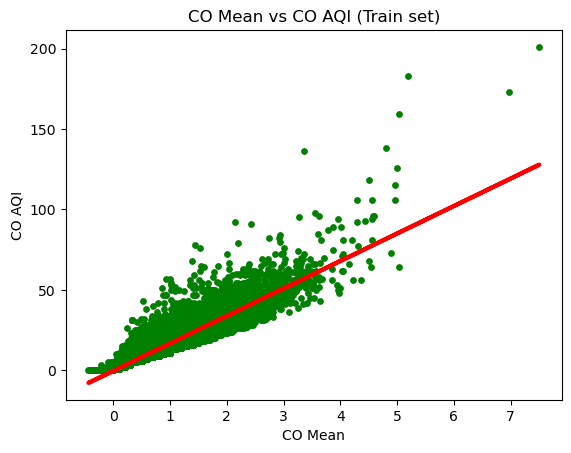

In [57]:
plot_test = plt
plot_test.scatter(X_train_2, y_train_2, color='green', s = 15)
plot_test.plot(X_train_2, y_predicted_train_2, color='red', linewidth =3)
plot_test.title('CO Mean vs CO AQI (Train set)')
plot_test.xlabel('CO Mean')
plot_test.ylabel('CO AQI')
plot_test.show()

### The model's outcome on the training set is very similar to that on the test set.  With the MSE being only one point higher on the train set.  Confirming that this is a good model to use.  This proves that CO Mean (pollutant concentration) has a significant impact on the AQI. 

## Regression analysis for NO2

In [58]:
X_3 = df['NO2 Mean'].values.reshape(-1,1)
y_3 = df['NO2 AQI'].values.reshape(-1,1)

In [59]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [60]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_3, y_train_3)

LinearRegression()

In [61]:
# Predict.

y_predicted_3 = regression.predict(X_test_3)

In [62]:
rmse = mean_squared_error(y_test_3, y_predicted_3)
r2 = r2_score(y_test_3, y_predicted_3)

In [63]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.45831666]]
Mean squared error:  37.789172122940165
R2 score:  0.8240817033754235


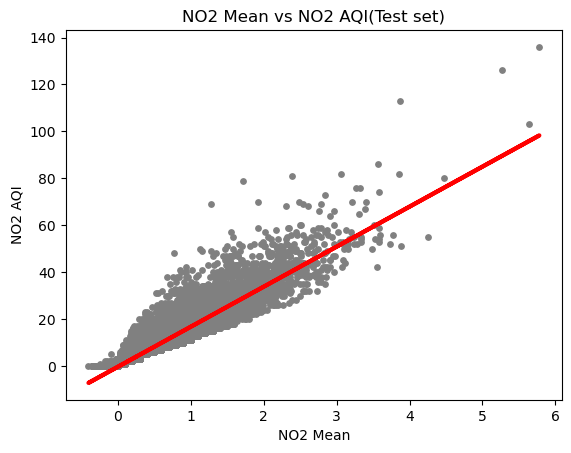

In [64]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('NO2 Mean vs NO2 AQI(Test set)')
plot_test.xlabel('NO2 Mean')
plot_test.ylabel('NO2 AQI')
plot_test.show()

##### The graph does shows linearity between NO2 Mean (pollutant concentration) and it's corresponding AQI value

In [65]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data.head(30)

,Actual,Predicted
0,7,7.225263
1,29,22.460331
2,30,43.283878
3,9,12.231244
4,1,5.294729
5,17,23.596603
6,21,23.136917
7,30,35.749241
8,64,69.047473
9,13,14.056781


In [66]:
# Predict on the training set

y_predicted_train_3 = regression.predict(X_train_3) # This is predicting X_train_3!

In [67]:
rmse = mean_squared_error(y_train_3, y_predicted_train_3)
r2 = r2_score(y_train_3, y_predicted_train_3)

In [68]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.45831666]]
Mean squared error:  37.53630890780097
R2 score:  0.8238240446732168


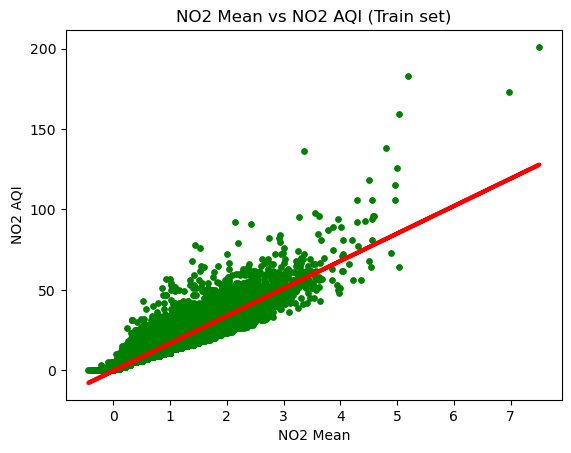

In [69]:
plot_test = plt
plot_test.scatter(X_train_2, y_train_2, color='green', s = 15)
plot_test.plot(X_train_2, y_predicted_train_2, color='red', linewidth =3)
plot_test.title('NO2 Mean vs NO2 AQI (Train set)')
plot_test.xlabel('NO2 Mean')
plot_test.ylabel('NO2 AQI')
plot_test.show()

### The model's outcome on the training set is very similar to that on the test set. With the MSE being only one point higher on the train set. Confirming that this is a good model to use. This proves that NO2 Mean (pollutant concentration) has a significant impact on the AQI.

## Regression analysis for SO2

In [70]:
X_4 = df['SO2 Mean'].values.reshape(-1,1)
y_4 = df['SO2 AQI'].values.reshape(-1,1)

In [71]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

In [72]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_4, y_train_4)

LinearRegression()

In [73]:
# Predict.

y_predicted_4 = regression.predict(X_test_4)

In [74]:
rmse = mean_squared_error(y_test_4, y_predicted_4)
r2 = r2_score(y_test_4, y_predicted_4)

In [75]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.5703149]]
Mean squared error:  32.94872994900403
R2 score:  0.7131497993647586


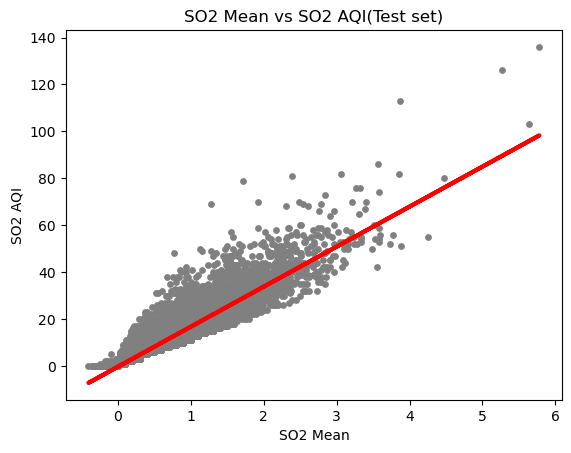

In [76]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('SO2 Mean vs SO2 AQI(Test set)')
plot_test.xlabel('SO2 Mean')
plot_test.ylabel('SO2 AQI')
plot_test.show()

##### The graph does shows linearity between SO2 Mean (pollutant concentration) and it's corresponding AQI value

In [77]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_predicted_4.flatten()})
data.head(30)

,Actual,Predicted
0,3.0,5.225988
1,0.0,1.413959
2,3.0,5.971930
3,3.0,5.558627
4,1.0,1.227681
5,7.0,10.687720
6,10.0,13.067931
7,9.0,13.067931
8,13.0,12.770406
9,6.0,4.127266


In [78]:
# Predict on the training set

y_predicted_train_4 = regression.predict(X_train_4) # This is predicting X_train_4!

In [79]:
rmse = mean_squared_error(y_train_4, y_predicted_train_4)
r2 = r2_score(y_train_4, y_predicted_train_4)

In [80]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.5703149]]
Mean squared error:  34.95964828016288
R2 score:  0.6979286142500414


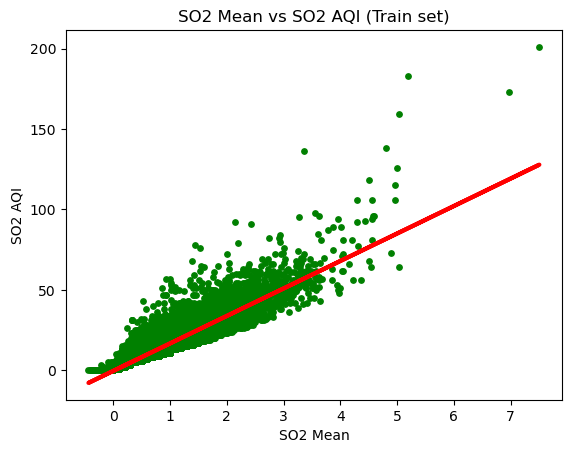

In [81]:
plot_test = plt
plot_test.scatter(X_train_2, y_train_2, color='green', s = 15)
plot_test.plot(X_train_2, y_predicted_train_2, color='red', linewidth =3)
plot_test.title('SO2 Mean vs SO2 AQI (Train set)')
plot_test.xlabel('SO2 Mean')
plot_test.ylabel('SO2 AQI')
plot_test.show()

### The model's outcome on the training set is very similar to that on the test set. With the MSE being only 2 points lower on the train set. This proves that SO2 Mean (pollutant concentration) has a impact on the AQI, but not as much as the other pollutants. 